In [2]:
import pandas as pd
import numpy as np
import var
import predict as pre
import utils

print('初始化变量...')
names = ['user_id', 'item_id', 'rating', 'timestamp']
direct = 'dataset/ml-100k/'
trainingset_files = (direct + name for name in ('u1.base', 'u2.base', 'u3.base', 'u4.base', 'u5.base'))
testset_files = (direct + name for name in ('u1.test', 'u2.test', 'u3.test', 'u4.test', 'u5.test'))

if __name__ == '__main__':
    
    i = 0
    nums = 5
    k_set = [5, 10, 15, 18, 20, 25, 30, 40, 50, 100, 200]
    rmse_topkCF_item_train = {k:[] for k in k_set}
    rmse_topkCF_user_train = {k:[] for k in k_set}
    rmse_topkCF_item = {k:[] for k in k_set}
    rmse_topkCF_user = {k:[] for k in k_set}
    for trainingset_file, testset_file in zip(trainingset_files, testset_files):
        i += 1
        print('------ 第%d/%d组样本 ------' % (i, nums))
        df = pd.read_csv(trainingset_file, sep='\t', names=names)
        
        var.ratings = np.zeros((var.n_users, var.n_items))
        print('载入训练集' + trainingset_file)
        for row in df.itertuples():
            var.ratings[row[1]-1, row[2]-1] = row[3]
          
        print('计算训练集各项统计数据...')
        utils.cal_mean()

        print('计算相似度矩阵...')
        var.user_similarity = utils.cal_similarity(kind='user')
        var.item_similarity = utils.cal_similarity(kind='item')
        print('计算完成')

        predictions_topkCF_item_train = {k:[] for k in k_set}
        predictions_topkCF_user_train = {k:[] for k in k_set}
        targets = []
        print('在训练集上测试...')
        for row in df.itertuples():
            user, item, actual = row[1]-1, row[2]-1, row[3]
            for k in k_set:
                predictions_topkCF_item_train[k].append(pre.predict_topkCF_item(user, item, k))
                predictions_topkCF_user_train[k].append(pre.predict_topkCF_user(user, item, k))
            targets.append(actual)
        for k in k_set:
            rmse_topkCF_item_train[k].append(utils.rmse(np.array(predictions_topkCF_item_train[k]), np.array(targets)))
            rmse_topkCF_user_train[k].append(utils.rmse(np.array(predictions_topkCF_user_train[k]), np.array(targets)))    
        
        print('载入测试集' + testset_file)
        test_df = pd.read_csv(testset_file, sep='\t', names=names)        
        predictions_topkCF_item = {k:[] for k in k_set}
        predictions_topkCF_user = {k:[] for k in k_set}
        targets = []
        print('测试集规模为 %d' % len(test_df))
        print('在测试集上测试...')
        for row in test_df.itertuples():
            user, item, actual = row[1]-1, row[2]-1, row[3]
            for k in k_set:
                predictions_topkCF_item[k].append(pre.predict_topkCF_item(user, item, k))
                predictions_topkCF_user[k].append(pre.predict_topkCF_user(user, item, k))
            targets.append(actual)
        for k in k_set:
            rmse_topkCF_item[k].append(utils.rmse(np.array(predictions_topkCF_item[k]), np.array(targets)))
            rmse_topkCF_user[k].append(utils.rmse(np.array(predictions_topkCF_user[k]), np.array(targets)))            
        print('测试完成')
        
    print('------ 测试结果 ------')
    
    print('item-item协同过滤算法中, 各K值在训练集上的RMSE:')
    for k in sorted(k_set):
        print('k = %3d:   %.4f' % (k, np.mean(rmse_topkCF_item_train[k])))
    print('item-item协同过滤算法中, 各K值在测试集上的RMSE:')
    for k in sorted(k_set):
        print('k = %3d:   %.4f' % (k, np.mean(rmse_topkCF_item[k])))
    print('user-user协同过滤算法中, 各K值在训练集上的RMSE:')
    for k in sorted(k_set):
        print('k = %3d:   %.4f' % (k, np.mean(rmse_topkCF_user_train[k])))
    print('user-user协同过滤算法中, 各K值在测试集上的RMSE:')
    for k in sorted(k_set):
        print('k = %3d:   %.4f' % (k, np.mean(rmse_topkCF_user[k])))
    

初始化变量...
------ 第1/5组样本 ------
载入训练集dataset/ml-100k/u1.base
计算训练集各项统计数据...
计算相似度矩阵...
计算完成
在训练集上测试...
载入测试集dataset/ml-100k/u1.test
测试集规模为 20000
在测试集上测试...
测试完成
------ 第2/5组样本 ------
载入训练集dataset/ml-100k/u2.base
计算训练集各项统计数据...
计算相似度矩阵...
计算完成
在训练集上测试...
载入测试集dataset/ml-100k/u2.test
测试集规模为 20000
在测试集上测试...
测试完成
------ 第3/5组样本 ------
载入训练集dataset/ml-100k/u3.base
计算训练集各项统计数据...
计算相似度矩阵...
计算完成
在训练集上测试...
载入测试集dataset/ml-100k/u3.test
测试集规模为 20000
在测试集上测试...
测试完成
------ 第4/5组样本 ------
载入训练集dataset/ml-100k/u4.base
计算训练集各项统计数据...
计算相似度矩阵...
计算完成
在训练集上测试...
载入测试集dataset/ml-100k/u4.test
测试集规模为 20000
在测试集上测试...
测试完成
------ 第5/5组样本 ------
载入训练集dataset/ml-100k/u5.base
计算训练集各项统计数据...
计算相似度矩阵...
计算完成
在训练集上测试...
载入测试集dataset/ml-100k/u5.test
测试集规模为 20000
在测试集上测试...
测试完成
------ 测试结果 ------
item-item协同过滤算法中, 各K值在训练集上的RMSE:
k =   5:   0.5747
k =  10:   0.6845
k =  15:   0.7322
k =  18:   0.7500
k =  20:   0.7596
k =  25:   0.7774
k =  30:   0.7902
k =  40:   0.8073
k =  50:   0.8182
k = 100:   0.8422
k = 

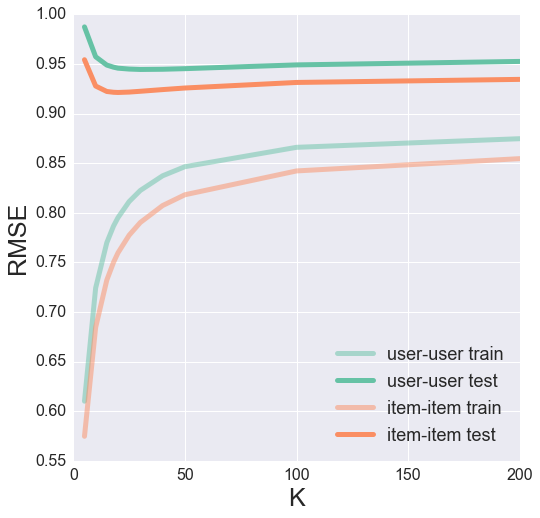

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
k_set = [5, 10, 15, 18, 20, 25, 30, 40, 50, 100, 200]
rmse_topkCF_item_train = [0.5747, 0.6845, 0.7322, 0.7500, 0.7596, 0.7774, 0.7902, 0.8073, 0.8182, 0.8422, 0.8546]
rmse_topkCF_item =       [0.9543, 0.9278, 0.9223, 0.9215, 0.9213, 0.9217, 0.9225, 0.9242, 0.9258, 0.9314, 0.9345]
rmse_topkCF_user_train = [0.6101, 0.7242, 0.7699, 0.7866, 0.7951, 0.8113, 0.8225, 0.8373, 0.8465, 0.8660, 0.8747]
rmse_topkCF_user =       [0.9874, 0.9573, 0.9489, 0.9468, 0.9458, 0.9449, 0.9445, 0.9447, 0.9453, 0.9491, 0.9526]
pal = sns.color_palette("Set2", 2)

t = 11
plt.figure(figsize=(8, 8))
plt.plot(k_set[:t], rmse_topkCF_user_train[:t], c=pal[0], label='user-user train', alpha=0.5, linewidth=5)
plt.plot(k_set[:t], rmse_topkCF_user[:t], c=pal[0], label='user-user test', linewidth=5)
plt.plot(k_set[:t], rmse_topkCF_item_train[:t], c=pal[1], label='item-item train', alpha=0.5, linewidth=5)
plt.plot(k_set[:t], rmse_topkCF_item[:t], c=pal[1], label='item-item test', linewidth=5)
plt.legend(loc='best', fontsize=18)
plt.xticks(fontsize=16);
plt.yticks(fontsize=16);
plt.xlabel('K', fontsize=25);
plt.ylabel('RMSE', fontsize=25);